# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1943 files belonging to 4 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


# Loading Model

In [3]:
#cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')
from tensorflow.keras.models import load_model

# Step 1: Load the model from the .keras file
model = load_model('trained_plant_disease_model.keras')

# Step 2: Modify the model layers if 'batch_input_shape' is causing issues
for layer in model.layers:
    if 'batch_input_shape' in layer.get_config():
        # Extract the config, replace 'batch_input_shape' with 'input_shape'
        config = layer.get_config()
        batch_input_shape = config.pop('batch_input_shape', None)
        if batch_input_shape:
            config['input_shape'] = batch_input_shape[1:]  # remove batch dimension

        # Recreate the layer with the updated config
        new_layer = type(layer).from_config(config)
        model.layers[model.layers.index(layer)] = new_layer

# Step 3: Optionally re-save the modified model
model.save('modified_model.keras')

# Now you can use the modified model without issues


#Visualising and Performing Prediction on Single image

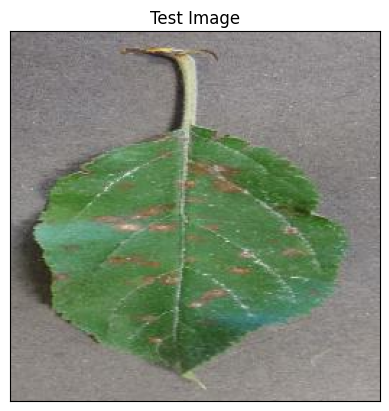

In [4]:
#Test Image Visualization
import cv2
image_path = 'test/AppleCedarRust2.JPG'
# image_path='train/Apple___Black_rot/istockphoto-661007346-612x612.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


In [6]:
print(predictions)

[[4.6548853e-03 1.4687969e-03 9.9387556e-01 6.8489010e-07]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


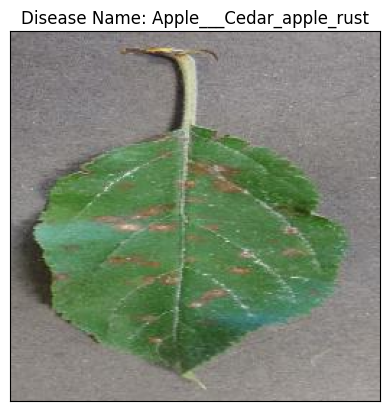

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

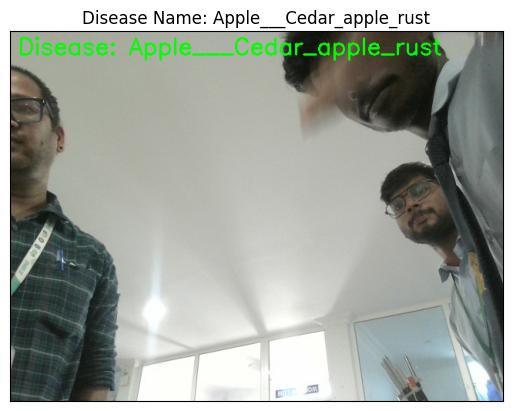

In [11]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Initialize the webcam
#cap = cv2.VideoCapture("http://127.0.0.1:5000/video_feed")
#cap = cv2.VideoCapture("http://172.24.25.12:5000/video_feed")
cap = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break
    
    # Preprocess the frame
    resized_frame = cv2.resize(frame, (128, 128))
    input_arr = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    input_arr = np.array([input_arr])  # Convert single image to a batch
    
    # Make prediction
    predictions = model.predict(input_arr)
    result_index = np.argmax(predictions)
    
    # Get the predicted class name
    model_prediction = class_name[result_index]
    
    # Display the result on the frame
    cv2.putText(frame, f"Disease: {model_prediction}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display the resulting frame
    cv2.imshow('Real-time Disease Detection', frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

# If you want to display the last processed frame using matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

**Plant ID Detection** 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


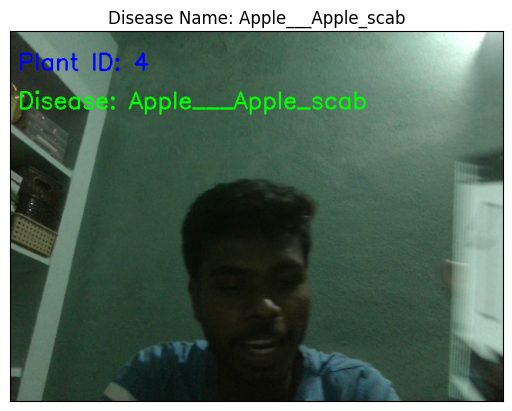

In [10]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pytesseract

# Set the path to your Tesseract installation (only if necessary)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Initialize the webcam
cap = cv2.VideoCapture(0)  # Change to your source if using an IP camera

plant_id_detected = False
plant_id = ""

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # ---- Step 1: Number Detection (OCR) ---- #
    # Convert the frame to grayscale for better OCR performance
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding or other image processing techniques for better OCR
    _, thresh_frame = cv2.threshold(gray_frame, 150, 255, cv2.THRESH_BINARY)
    
    # Detect text (number) in the frame using Tesseract OCR
    detected_text = pytesseract.image_to_string(thresh_frame, config='--psm 8 digits')
    
    # Clean the detected text to only extract the numbers (plant ID)
    plant_id = ''.join(filter(str.isdigit, detected_text))
    
    # If plant ID is detected, display it on the frame
    if plant_id:
        cv2.putText(frame, f"Plant ID: {plant_id}", (10, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        plant_id_detected = True
    else:
        plant_id_detected = False

    # Display the frame with plant ID
    cv2.imshow('Plant ID Detection', frame)

    # ---- Step 2: Disease Detection (Only if Plant ID is detected) ---- #
    if plant_id_detected:
        # Preprocess the frame for the disease detection model
        resized_frame = cv2.resize(frame, (128, 128))
        input_arr = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
        input_arr = np.array([input_arr])  # Convert single image to a batch

        # Make prediction using the model (ensure 'model' is already loaded)
        predictions = model.predict(input_arr)
        result_index = np.argmax(predictions)

        # Get the predicted class name (ensure 'class_name' is defined with your model's classes)
        model_prediction = class_name[result_index]

        # Display the disease prediction result on the frame
        cv2.putText(frame, f"Disease: {model_prediction}", (10, 100),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Display the frame with the plant ID and disease prediction
        cv2.imshow('Real-time Disease & Plant ID Detection', frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

# If you want to display the last processed frame using matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


Added database operations in this

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Updated data for Plant ID: 1 with Disease: Apple___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Updated data for Plant ID: 4 with Disease: Apple___Cedar_apple_rust


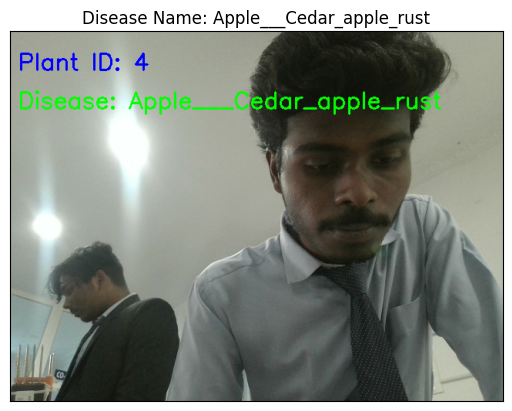

In [9]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pytesseract
import sqlite3
from datetime import datetime

# Set the path to your Tesseract installation (only if necessary)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Initialize the webcam
cap = cv2.VideoCapture(0)  # Change to your source if using an IP camera
#cap = cv2.VideoCapture("http://172.24.25.12:5000/video_feed")

plant_id_detected = False
plant_id = ""

# ---- Step 0: Connect to SQLite database ---- #
conn = sqlite3.connect('plant_disease_data.db')
cursor = conn.cursor()

# Create table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS plant_disease_data (
    plant_id TEXT PRIMARY KEY,
    disease TEXT,
    date TIMESTAMP
)
''')
conn.commit()

# Function to insert or update data into the database
def insert_or_update_plant_data(plant_id, disease):
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # Check if plant ID already exists in the database
    cursor.execute("SELECT * FROM plant_disease_data WHERE plant_id = ?", (plant_id,))
    result = cursor.fetchone()

    if result:
        # If plant ID exists, update the disease and timestamp
        cursor.execute("UPDATE plant_disease_data SET disease = ?, date = ? WHERE plant_id = ?",
                       (disease, current_time, plant_id))
        print(f"Updated data for Plant ID: {plant_id} with Disease: {disease}")
    else:
        # If plant ID doesn't exist, insert new record
        cursor.execute("INSERT INTO plant_disease_data (plant_id, disease, date) VALUES (?, ?, ?)",
                       (plant_id, disease, current_time))
        print(f"Inserted new data for Plant ID: {plant_id} with Disease: {disease}")
    
    # Commit the changes
    conn.commit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # ---- Step 1: Number Detection (OCR) ---- #
    # Convert the frame to grayscale for better OCR performance
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding or other image processing techniques for better OCR
    _, thresh_frame = cv2.threshold(gray_frame, 150, 255, cv2.THRESH_BINARY)
    
    # Detect text (number) in the frame using Tesseract OCR
    detected_text = pytesseract.image_to_string(thresh_frame, config='--psm 8 digits')
    
    # Clean the detected text to only extract the numbers (plant ID)
    plant_id = ''.join(filter(str.isdigit, detected_text))
    
    # If plant ID is detected, display it on the frame
    if plant_id:
        cv2.putText(frame, f"Plant ID: {plant_id}", (10, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        plant_id_detected = True
    else:
        plant_id_detected = False

    # Display the frame with plant ID
    cv2.imshow('Plant ID Detection', frame)

    # ---- Step 2: Disease Detection (Only if Plant ID is detected) ---- #
    if plant_id_detected:
        # Preprocess the frame for the disease detection model
        resized_frame = cv2.resize(frame, (128, 128))
        input_arr = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
        input_arr = np.array([input_arr])  # Convert single image to a batch

        # Make prediction using the model (ensure 'model' is already loaded)
        predictions = model.predict(input_arr)
        result_index = np.argmax(predictions)

        # Get the predicted class name (ensure 'class_name' is defined with your model's classes)
        model_prediction = class_name[result_index]

        # Display the disease prediction result on the frame
        cv2.putText(frame, f"Disease: {model_prediction}", (10, 100),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Insert or update plant ID and disease in the database
        insert_or_update_plant_data(plant_id, model_prediction)

        # Display the frame with the plant ID and disease prediction
        cv2.imshow('Real-time Disease & Plant ID Detection', frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

# Close the database connection
conn.close()

# If you want to display the last processed frame using matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()



In [10]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pytesseract
import sqlite3
from datetime import datetime

# Initialize the webcam
cap = cv2.VideoCapture(0)  # Change to your source if using an IP camera
#cap = cv2.VideoCapture("http://172.24.25.12:5000/video_feed")



plant_id_detected = False
plant_id = ""

# ---- Step 0: Connect to SQLite database ---- #
conn = sqlite3.connect('plant_disease_data.db')
cursor = conn.cursor()

# Create table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS plant_disease_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    plant_id TEXT,
    disease TEXT,
    date TIMESTAMP
)
''')

conn.commit()

# Function to insert new data into the database
def insert_plant_data(plant_id, disease):
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    cursor.execute("INSERT INTO plant_disease_data (plant_id, disease, date) VALUES (?, ?, ?)",
                   (plant_id, disease, current_time))
    print(f"Inserted new data for Plant ID: {plant_id} with Disease: {disease}")
    
    # Commit the changes
    conn.commit()

# Function to fetch plant disease history for visualization
def fetch_plant_history(plant_id):
    cursor.execute("SELECT date, disease FROM plant_disease_data WHERE plant_id = ?", (plant_id,))
    data = cursor.fetchall()
    return data

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # ---- Step 1: Number Detection (OCR) ---- #
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh_frame = cv2.threshold(gray_frame, 150, 255, cv2.THRESH_BINARY)
    
    # Detect text (number) in the frame using Tesseract OCR
    detected_text = pytesseract.image_to_string(thresh_frame, config='--psm 8 digits')
    plant_id = ''.join(filter(str.isdigit, detected_text))
    
    # If plant ID is detected, display it on the frame
    if plant_id:
        cv2.putText(frame, f"Plant ID: {plant_id}", (10, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        plant_id_detected = True
    else:
        plant_id_detected = False

    # Display the frame with plant ID
    cv2.imshow('Plant ID Detection', frame)

    # ---- Step 2: Disease Detection (Only if Plant ID is detected) ---- #
    if plant_id_detected:
        # Preprocess the frame for the disease detection model
        resized_frame = cv2.resize(frame, (128, 128))
        input_arr = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
        input_arr = np.array([input_arr])  # Convert single image to a batch

        # Make prediction using the model (ensure 'model' is already loaded)
        predictions = model.predict(input_arr)
        result_index = np.argmax(predictions)

        # Get the predicted class name (ensure 'class_name' is defined with your model's classes)
        model_prediction = class_name[result_index]

        # Display the disease prediction result on the frame
        cv2.putText(frame, f"Disease: {model_prediction}", (10, 100),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Insert new plant ID and disease data into the database
        insert_plant_data(plant_id, model_prediction)

        # Display the frame with the plant ID and disease prediction
        cv2.imshow('Real-time Disease & Plant ID Detection', frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

# Close the database connection
conn.close()

# ---- Visualization: Plot disease occurrences over time for a specific plant ---- #
def visualize_plant_disease_history(plant_id):
    # Fetch the history from the database
    history = fetch_plant_history(plant_id)

    if not history:
        print(f"No data found for Plant ID: {plant_id}")
        return

    # Separate the dates and diseases
    dates, diseases = zip(*history)

    # Convert string dates to datetime objects
    dates = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in dates]

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(dates, diseases, marker='o', linestyle='-', color='b')
    plt.title(f"Disease Occurrence for Plant ID: {plant_id} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Disease")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()